### Assignment 3
#### Exploring Data with PCA

#### Seasons Dataset

In [42]:
# Initial imports
%pylab inline

from PIL import Image
import os
import pandas as pd
import pylab as pl
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


In [43]:
# Image functions
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [44]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir, grayscale=False) # load images in the specified directory

X = pd.DataFrame([im.histogram() for im in images])

#### Part 1

In [45]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

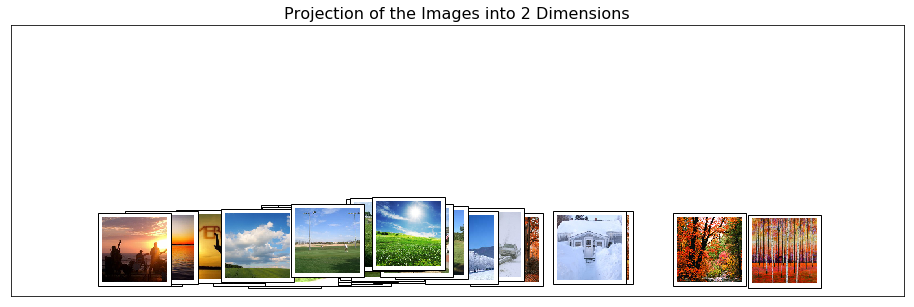

In [46]:
plot_image_space(images, X, title="Projection of the Images into 2 Dimensions")

#### Part 2
##### 1. Images that are closer together are closer together in color histogram (frequency of occurring colors).

##### 2. Its hard to tell but the spring and winter seem to cluster together fairly well. I think this might be the case because both seasons are fairly simplistic in how they are captured. Winter has a high frequency of white and blue colors. Spring is typically a green grassy ground and mostly clear blue sky. Fall and Summer have more variation and histograms can fall further apart on the new 2 dimension plot.

#### Part 3
##### Images characterized by 'low' and 'high' saturation. The clustering is quite good with all the vibrant images plotted on the far right and the more subtle middle color values of the low saturation images being plotted in the middle with a decent variance in their X position.

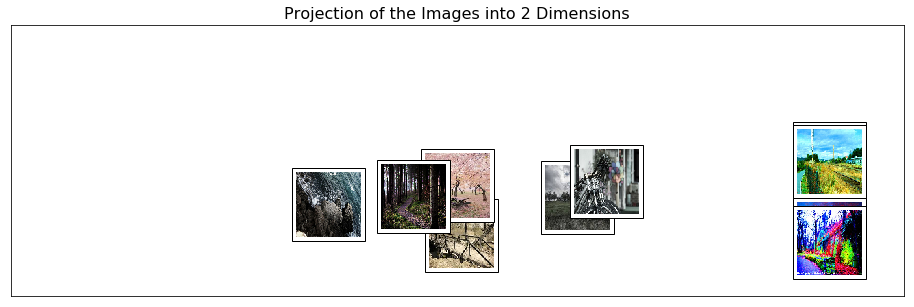

In [47]:
img_dir = os.path.join(os.getcwd(), "saturation") # directory path
images = load_images(img_dir) # load images in the specified directory

X = pd.DataFrame([im.histogram() for im in images])

pca = PCA(n_components=2)
pca.fit(X)

plot_image_space(images, X, title="Projection of the Images into 2 Dimensions")

##### Images characterized by the colors red, green or blue. Each image has one vibrant primary color. Since they differ for the most part by only one dimension (red, green or blue color) and the color they do use has lots of values at 255, everything falls together in the plot. This is the same case if you compare lots of pictures with a predominantly white background (the cats in the 2nd plot, despite it containing 3 distinct colorations of cats).

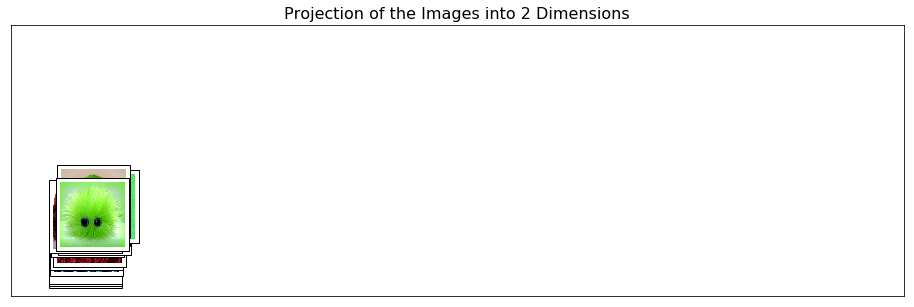

In [48]:
img_dir = os.path.join(os.getcwd(), "color") # directory path
images = load_images(img_dir) # load images in the specified directory

X = pd.DataFrame([im.histogram() for im in images])

pca = PCA(n_components=2)
pca.fit(X)

plot_image_space(images, X, title="Projection of the Images into 2 Dimensions")

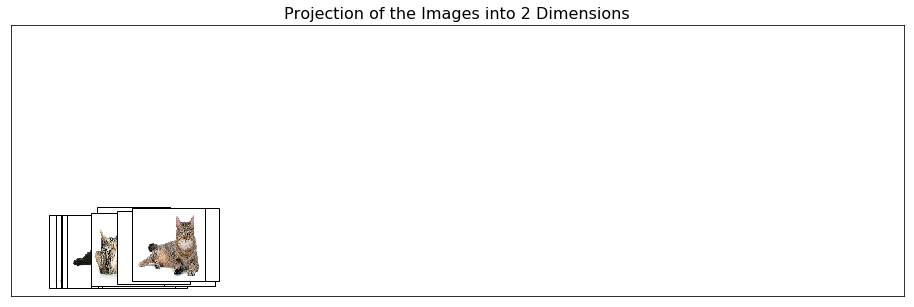

In [49]:
img_dir = os.path.join(os.getcwd(), "cats") # directory path
images = load_images(img_dir) # load images in the specified directory

X = pd.DataFrame([im.histogram() for im in images])

pca = PCA(n_components=2)
pca.fit(X)

plot_image_space(images, X, title="Projection of the Images into 2 Dimensions")

![title](cats/2.jpg)
![title](cats/11.jpg)
![title](cats/27.jpg)